[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Baraa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset shape: (6335, 4)
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


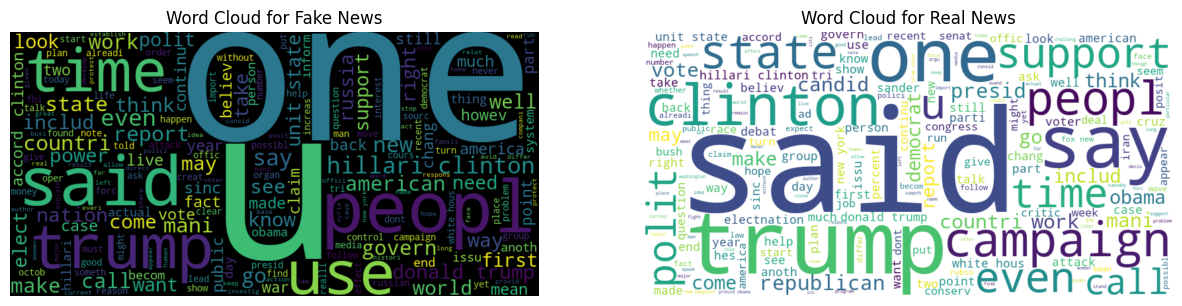

Accuracy: 93.84%


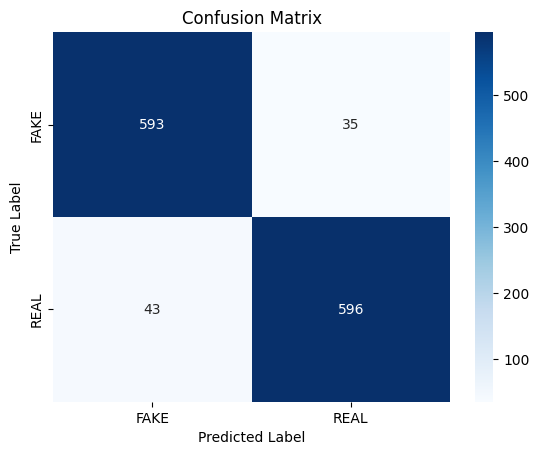

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       628
        REAL       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk


nltk.download('stopwords')

df = pd.read_csv(r'C:\Users\Baraa\Downloads\FakeNewDocument\news.csv')


print("Dataset shape:", df.shape)
print(df.head())


stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(preprocess_text)

fake_news = ' '.join(df[df['label'] == 'FAKE']['text'])
real_news = ' '.join(df[df['label'] == 'REAL']['text'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_news)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Word Cloud for Fake News")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title("Word Cloud for Real News")
plt.axis('off')

plt.show()


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, ngram_range=(1, 2))
tfidf_data = tfidf_vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_data, df['label'], test_size=0.2, random_state=42)


param_grid = {
    'max_iter': [50, 200, 500],
    'C': [0.01, 0.1, 1.0, 10],
    
}

pac = PassiveAggressiveClassifier(max_iter=1000)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:\n", classification_report(y_test, target_names=['FAKE', 'REAL']))
